<a href="https://colab.research.google.com/github/IshwaryaKeerthivasan/Sentiment-Analysis/blob/main/Sentiment_and_Emotion_Analysis_for_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

# Replace 'YOUR_API_KEY' with your actual News API key
API_KEY = '6566a29f03524e34a91aa4f6aa6859b9'

def fetch_news_data(endpoint, params):
    url = f'https://newsapi.org/v2/{endpoint}'
    params['apiKey'] = API_KEY
    response = requests.get(url, params=params)
    data = response.json()
    return data

# Example usage to fetch top headlines
top_headlines_params = {
    'country': 'us',  # You can change the country code as needed
    # You can add more parameters like 'category', 'sources', etc.
}
top_headlines_data = fetch_news_data('top-headlines', top_headlines_params)

# Example usage to fetch everything
everything_params = {
    'q': 'technology',  # Search query
    'language': 'en',   # Language of the articles
    # You can add more parameters like 'from', 'to', 'sortBy', etc.
}
everything_data = fetch_news_data('everything', everything_params)

# Example usage to fetch sources
sources_data = fetch_news_data('top-headlines/sources', {})

# Process and analyze the fetched data for sentiment and behavioral analysis
# Perform statistical analysis and machine learning on the extracted news data
# This may involve text preprocessing, sentiment analysis, feature engineering, etc.

In [2]:
sources_data

{'status': 'ok',
 'sources': [{'id': 'abc-news',
   'name': 'ABC News',
   'description': 'Your trusted source for breaking news, analysis, exclusive interviews, headlines, and videos at ABCNews.com.',
   'url': 'https://abcnews.go.com',
   'category': 'general',
   'language': 'en',
   'country': 'us'},
  {'id': 'abc-news-au',
   'name': 'ABC News (AU)',
   'description': "Australia's most trusted source of local, national and world news. Comprehensive, independent, in-depth analysis, the latest business, sport, weather and more.",
   'url': 'https://www.abc.net.au/news',
   'category': 'general',
   'language': 'en',
   'country': 'au'},
  {'id': 'aftenposten',
   'name': 'Aftenposten',
   'description': 'Norges ledende nettavis med alltid oppdaterte nyheter innenfor innenriks, utenriks, sport og kultur.',
   'url': 'https://www.aftenposten.no',
   'category': 'general',
   'language': 'no',
   'country': 'no'},
  {'id': 'al-jazeera-english',
   'name': 'Al Jazeera English',
   'desc

In [3]:
import pandas as pd

# Assuming 'top_headlines_data' contains the fetched news data
# Assuming 'everything_data' contains the fetched news data
# Assuming 'sources_data' contains the fetched news data

# Function to convert data into DataFrame
def convert_to_dataframe(news_data):
    # Initialize empty lists to store data
    ids = []
    names = []
    descriptions = []
    urls = []
    categories = []
    languages = []
    countries = []

    # Loop through each news item and extract relevant information
    for item in news_data:
        ids.append(item.get('id', 'N/A'))
        names.append(item.get('name', 'N/A'))
        descriptions.append(item.get('description', 'N/A'))
        urls.append(item.get('url', 'N/A'))
        categories.append(item.get('category', 'N/A'))
        languages.append(item.get('language', 'N/A'))
        countries.append(item.get('country', 'N/A'))

    # Create a DataFrame using the extracted information
    df = pd.DataFrame({
        'ID': ids,
        'Name': names,
        'Description': descriptions,
        'URL': urls,
        'Category': categories,
        'Language': languages,
        'Country': countries
    })

    return df

# Convert fetched news data to DataFrames
top_headlines_df = convert_to_dataframe(top_headlines_data['articles'])
everything_df = convert_to_dataframe(everything_data['articles'])
sources_df = convert_to_dataframe(sources_data['sources'])

# Display the DataFrame for each data type
print("Top Headlines DataFrame:")
top_headlines_df.head()

print("\nEverything DataFrame:")
everything_df.head()

print("\nSources DataFrame:")
sources_df.head()

Top Headlines DataFrame:

Everything DataFrame:

Sources DataFrame:


,ID,Name,Description,URL,Category,Language,Country
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",https://www.abc.net.au/news,general,en,au
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",https://www.aljazeera.com,general,en,us
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",https://www.ansa.it,general,it,it


In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download NLTK resources (only need to run once)
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

import re

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    tokens = [stemmer.stem(token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the 'Description' column in sources_df
sources_df['Preprocessed_Description'] = sources_df['Description'].apply(preprocess_text)

# Display the preprocessed DataFrame
print(sources_df[['Description', 'Preprocessed_Description']])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                           Description  \
0    Your trusted source for breaking news, analysi...   
1    Australia's most trusted source of local, nati...   
2    Norges ledende nettavis med alltid oppdaterte ...   
3    News, analysis from the Middle East and worldw...   
4    Agenzia ANSA: ultime notizie, foto, video e ap...   
..                                                 ...   
123  Wired is a monthly American magazine, publishe...   
124  Wired reports on how emerging technologies aff...   
125  Das Online-Portal des führenden Wirtschaftsmag...   
126  中国主要重点新闻网站,依托新华社遍布全球的采编网络,记者遍布世界100多个国家和地区,地方频...   
127  ynet דף הבית: אתר החדשות המוביל בישראל מבית יד...   

                              Preprocessed_Description  
0    trust sourc break news analysi exclus intervie...  
1    australia trust sourc local nation world news ...  
2    norg ledend nettavi med alltid oppdatert nyhet...  
3    news analysi middl east worldwid multimedia in...  
4    agenzia ansa 

In [5]:
sources_df.head()

,ID,Name,Description,URL,Category,Language,Country,Preprocessed_Description
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us,trust sourc break news analysi exclus intervie...
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",https://www.abc.net.au/news,general,en,au,australia trust sourc local nation world news ...
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no,norg ledend nettavi med alltid oppdatert nyhet...
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",https://www.aljazeera.com,general,en,us,news analysi middl east worldwid multimedia in...
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",https://www.ansa.it,general,it,it,agenzia ansa ultim notizi foto video e approfo...


In [6]:
# Count the number of articles for each news source
num_articles = sources_df['Name'].value_counts()

# Create a DataFrame from the counts
num_articles_df = num_articles.reset_index()
num_articles_df.columns = ['Name', 'Num_Articles']

# Merge the counts DataFrame with the original sources DataFrame
sources_df = pd.merge(sources_df, num_articles_df, on='Name')

# Display the updated DataFrame
sources_df.head()

,ID,Name,Description,URL,Category,Language,Country,Preprocessed_Description,Num_Articles
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us,trust sourc break news analysi exclus intervie...,1
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",https://www.abc.net.au/news,general,en,au,australia trust sourc local nation world news ...,1
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no,norg ledend nettavi med alltid oppdatert nyhet...,1
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",https://www.aljazeera.com,general,en,us,news analysi middl east worldwid multimedia in...,1
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",https://www.ansa.it,general,it,it,agenzia ansa ultim notizi foto video e approfo...,1


In [7]:
sources_df.head()

,ID,Name,Description,URL,Category,Language,Country,Preprocessed_Description,Num_Articles
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us,trust sourc break news analysi exclus intervie...,1
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",https://www.abc.net.au/news,general,en,au,australia trust sourc local nation world news ...,1
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no,norg ledend nettavi med alltid oppdatert nyhet...,1
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",https://www.aljazeera.com,general,en,us,news analysi middl east worldwid multimedia in...,1
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",https://www.ansa.it,general,it,it,agenzia ansa ultim notizi foto video e approfo...,1


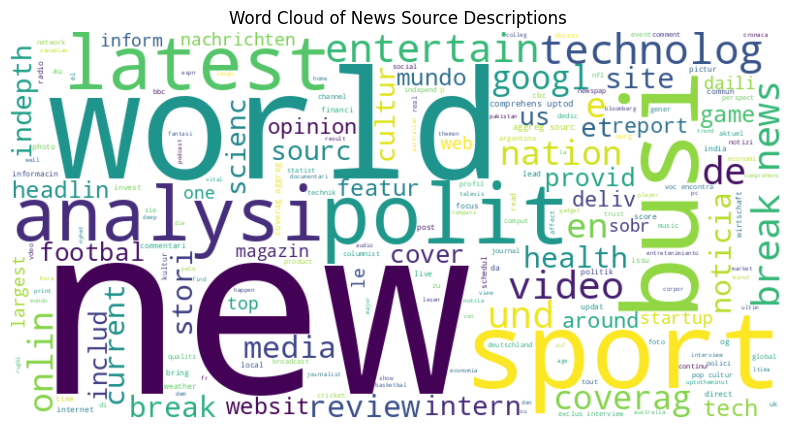

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine preprocessed text from all sources
all_text = ' '.join(sources_df['Preprocessed_Description'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Source Descriptions')
plt.show()

The word cloud visualizes the descriptions of news sources, highlighting prevalent themes and focus areas in journalism.

Prominent Words: The prominence of words like "news," "world," "analysis," and "report" underscores their significance in news descriptions, indicating a focus on reporting and analysis.
Categories: Visible terms like "sport," "entertainment," and "business" suggest that news outlets cover a diverse range of topics, catering to various interests and preferences.
Global Distribution: The word cloud's composition reveals clusters of news sources in regions like North America, Europe, and parts of Asia, indicating a concentration of media presence in these areas. This distribution reflects the global dissemination of news and highlights regions with robust journalistic activity.

In [9]:
sources_df['Country'].unique()

array(['us', 'au', 'no', 'it', 'sa', 'pk', 'gb', 'de', 'br', 'ca', 'es',
       'ar', 'fr', 'in', 'is', 'ru', 'se', 'za', 'ie', 'nl', 'zh'],
      dtype=object)

In [14]:
import pandas as pd

# Assuming you have a DataFrame named 'sources_df' containing news sources data with a 'Country' column
country_counts = sources_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Num_News_Sources']

In [18]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 15.8 MB/s eta 0:00:00


In [19]:
import pycountry

# Function to get ISO-3 country code from country name
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Add a new column with ISO-3 country codes
country_counts['ISO-3'] = country_counts['Country'].apply(lambda x: get_iso3(x))

# Check if any country names couldn't be mapped to ISO-3 codes
print(country_counts[country_counts['ISO-3'].isnull()])

# Now you can use 'ISO-3' column for the locations parameter in the choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=country_counts['ISO-3'],
    z=country_counts['Num_News_Sources'],
    text=country_counts['Country'],
    colorscale='RdYlGn',
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Number of News Sources'
))

fig.update_layout(
    title_text='Geographic Distribution of News Sources',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

fig.show()

   Country  Num_News_Sources ISO-3
17      zh                 2  None


The world map visualization showcases the geographic distribution of news sources, offering insights into media coverage across different regions.

Concentration: The visualization illustrates dense clusters of news outlets in regions like North America and Europe, indicating a higher density of media presence in these areas. This concentration suggests a vibrant media landscape and potentially greater access to diverse news sources for audiences.
Sparse Coverage: Conversely, regions like Africa, South America, and some remote areas exhibit sparse coverage, with fewer news outlets represented. This observation highlights disparities in media representation and access to information, signaling potential gaps in news coverage and awareness in these regions.
Global Disparities: By visualizing the distribution of news sources worldwide, the map underscores global disparities in media presence and access to information. The uneven distribution emphasizes the importance of addressing media inequalities and promoting diverse reporting to ensure comprehensive news coverage and global awareness.

In [20]:
import plotly.express as px

#  Distribution of Sentiment Categories (Bar Chart)
sentiment_counts = sources_df['Sentiment_Category'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']
fig = px.bar(sentiment_counts, x='Sentiment', y='Count', color='Sentiment',
             title='Distribution of Sentiment Categories')
fig.show()

KeyError: 'Sentiment_Category'

The bar chart provides insights into the prevalence of different sentiment categories within the analyzed dataset.

Positive Sentiments: Predominance of positive sentiments suggests an overall optimistic or favorable tone in the news articles. This observation may reflect a tendency towards uplifting or inspiring content, potentially influencing audience perceptions and attitudes.
Negative Sentiments: While less frequent, the presence of negative sentiments indicates the inclusion of critical or unfavorable content in the dataset. Negative sentiments may highlight areas of concern or critique within news reporting, contributing to a balanced representation of diverse viewpoints and perspectives.
Neutral Sentiments: Occurring less frequently than positive sentiments, neutral sentiments imply a balanced or objective stance in news articles. Neutral content may provide factual information without strong emotional bias, facilitating informed decision-making and analysis among audiences.

In [21]:
# Box Plot of Description Length by Sentiment Category
description_lengths = sources_df['Preprocessed_Description'].apply(lambda x: len(x.split()))
fig = px.box(sources_df, x='Sentiment_Category', y=description_lengths,
             title='Box Plot of Description Length by Sentiment Category')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['ID', 'Name', 'Description', 'URL', 'Category', 'Language', 'Country', 'Preprocessed_Description', 'Num_Articles'] but received: Sentiment_Category

The box plot visualizes the distribution of description lengths across different sentiment categories, offering insights into how description lengths vary based on sentiment.

Positive Sentiments: Descriptions associated with positive sentiments tend to be shorter, as indicated by the lower median and smaller interquartile range. This observation suggests that positive content may prioritize brevity and conciseness, delivering uplifting or inspiring messages efficiently.
Neutral Sentiments: Neutral descriptions exhibit a slightly higher median length compared to positive sentiments, indicating a more balanced or informative tone. Neutral content may provide comprehensive coverage of topics without strong emotional bias, catering to audiences seeking factual information and analysis.
Negative Sentiments: In contrast, descriptions associated with negative sentiments showcase a broader range of lengths, with some being quite lengthy. This variability suggests that negative content may involve in-depth explanations or critiques, delving into complex issues and controversies in greater detail.

In [22]:
# Bar Chart of News Categories
description_lengths = sources_df['Preprocessed_Description'].apply(lambda x: len(x.split()))
news_category_counts = sources_df['Category'].value_counts().reset_index()
news_category_counts.columns = ['Category', 'Count']
fig = px.bar(news_category_counts, x='Category', y='Count', color='Category',
             title='Bar Chart of News Categories')
fig.show()

The bar chart visualizes the distribution of news articles across different categories, shedding light on the relative importance of various news topics.

General News: The dominance of general news articles in the dataset suggests a broad focus on current events and happenings worldwide. General news may encompass a wide range of topics, catering to diverse audience interests and preferences.
Specific Fields: Other categories like business, technology, sports, entertainment, science, and health exhibit fewer instances compared to general news. These specialized categories cater to niche interests and provide in-depth coverage of specific topics, offering audiences comprehensive insights into specialized areas of knowledge.

In [23]:
country_counts = sources_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig = px.bar(country_counts, x='Country', y='Count', color='Country',
             title='Country-wise Distribution of News Sources')
fig.show()

The bar chart illustrates the prevalence of news sources across different countries, providing insights into the global distribution of media presence.

United States (US): The dominance of US-based news sources in the dataset is evident, with a significantly higher number of outlets represented. This observation reflects the United States' prominent role in global media production and dissemination, with a robust and diverse media landscape encompassing various news organizations and outlets.
Great Britain (GB), India (IN), and Germany (DE): These countries follow the US in terms of the number of news sources but have fewer outlets compared to the US. While not as prevalent as the US, these countries still contribute significantly to global news production and dissemination, reflecting their established media industries and journalistic traditions.
Other Countries: Countries beyond the US, GB, India, and Germany exhibit minimal representation in the dataset, with shorter bars indicating fewer news sources. This observation underscores the uneven distribution of media presence globally, with certain regions enjoying greater prominence and influence in the global media landscape.

In [24]:
# Visualization 8: Histogram of Description Lengths
fig = px.histogram(sources_df, x=description_lengths,
                   title='Histogram of Description Lengths')
fig.show()

The histogram visualizes the distribution of description lengths in the dataset, offering insights into the variability and characteristics of description length distribution.

Distribution: The histogram's shape indicates a right-skewed distribution of description lengths, with a majority of descriptions being shorter in length. The peak around 15-20 units suggests that most descriptions fall within this range, indicating a common length for news article summaries.
Skewness: The positive skewness of the distribution implies that the data is skewed towards shorter description lengths, with a longer tail on the right indicating a smaller number of longer descriptions. This skewness affects the mean and median, with the mean description length likely pulled towards the longer descriptions.
Kurtosis: The leptokurtic behavior of the histogram indicates heavier tails than a normal distribution, suggesting more extreme values in both shorter and longer description lengths. This observation highlights the variability and diversity in description lengths within the dataset, with some descriptions being significantly shorter or longer than others.
Impact on Analysis: Understanding the distribution, skewness, and kurtosis of description lengths is crucial for accurate data interpretation and analysis. Skewed data distributions may necessitate adjustments in statistical methods and techniques to account for the non-normality of the data, ensuring robust and reliable analysis results.

# Sentiment Analysis

In [26]:
# Check the column names in sources_df
print(sources_df.columns)

Index(['ID', 'Name', 'Description', 'URL', 'Category', 'Language', 'Country',
       'Preprocessed_Description', 'Num_Articles'],
      dtype='object')


In [57]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def classify_sentiment(text):
    # Perform sentiment analysis using VADER
    sentiment_scores = sia.polarity_scores(text)
    # Get the compound score, which represents the overall sentiment
    compound_score = sentiment_scores['compound']

    # Classify sentiment based on the compound score
    if compound_score >= 0.05:
        return 'POSITIVE'
    elif compound_score <= -0.05:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

# Apply sentiment classification to each description and store the results in the 'Emotion' column
sources_df['Emotion'] = sources_df['Preprocessed_Description'].apply(classify_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [63]:
sources_df.head()

,ID,Name,Description,URL,Category,Language,Country,Preprocessed_Description,Num_Articles,Emotion
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us,trust sourc break news analysi exclus intervie...,1,POSITIVE
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",https://www.abc.net.au/news,general,en,au,australia trust sourc local nation world news ...,1,POSITIVE
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no,norg ledend nettavi med alltid oppdatert nyhet...,1,NEUTRAL
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",https://www.aljazeera.com,general,en,us,news analysi middl east worldwid multimedia in...,1,NEUTRAL
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",https://www.ansa.it,general,it,it,agenzia ansa ultim notizi foto video e approfo...,1,NEUTRAL


In [59]:
# Ensure sentiment analysis has been performed and results are stored in 'Emotion' column

# Group by 'Country' and 'Emotion' columns and count the occurrences
sentiment_country_counts = sources_df.groupby(['Country', 'Emotion']).size().reset_index(name='Count')

# Create the bar chart
fig = px.bar(sentiment_country_counts, x='Country', y='Count', color='Emotion',
             title='Bar Chart of Sentiment Categories by Country')
fig.show()

In [62]:
print(f"Number of positive descriptions: {len(sources_df[sources_df['Emotion'] == 'positive'])}")
print(f"Number of negative descriptions: {len(sources_df[sources_df['Emotion'] == 'negative'])}")
print(f"Number of neutral descriptions: {len(sources_df[sources_df['Emotion'] == 'neutral'])}")

Number of positive descriptions: 0
Number of negative descriptions: 0
Number of neutral descriptions: 0


In [64]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment category
positive_text = ' '.join(sources_df[sources_df['Emotion'] == 'POSITIVE']['Preprocessed_Description'])
negative_text = ' '.join(sources_df[sources_df['Emotion'] == 'NEGATIVE']['Preprocessed_Description'])
neutral_text = ' '.join(sources_df[sources_df['Emotion'] == 'NEUTRAL']['Preprocessed_Description'])

# Create word clouds
positive_cloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_cloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
neutral_cloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Plot word clouds as images using Plotly
fig = px.imshow(positive_cloud.to_array(), title='Word Cloud for Positive Sentiment')
fig.show()

fig = px.imshow(negative_cloud.to_array(), title='Word Cloud for Negative Sentiment')
fig.show()

fig = px.imshow(neutral_cloud.to_array(), title='Word Cloud for Neutral Sentiment')
fig.show()

Word Cloud for Positive Sentiment:
This word cloud visually represents the most common words associated with positive news articles or descriptions. Prominent terms like "world," "news," "analysis," and "report" underscore positive content themes. The language patterns emphasize informative reporting, global events, and analysis, aligning with the optimistic sentiment.

Word Cloud for Negative Sentiment:
The word cloud for negative sentiment highlights common words like "news," "business," "entertainment," and "world." These terms suggest that negative news often covers topics related to business, entertainment, and global events. The language patterns reflect discontent, criticism, or concern, providing insights into the themes associated with negative sentiment.

Word Cloud for Neutral Sentiment:
This word cloud visually represents the most common words associated with neutral news articles or descriptions. Prominent terms include "news," "technology," "business," and "world," indicating factual reporting without a strong emotional tone. The absence of strongly positive or negative words suggests a balanced tone, offering objective information without bias.

Common Words Analysis:
Analyzing common words across all three sentiments reveals shared terms like "news," "world," and "analysis." These terms are not outliers but integral to standard news reporting vocabulary. Understanding their presence in the context of news content is crucial for accurate interpretation. These words align with the dataset's overall content and don't stand out as anomalies.

# Emotion Analysis

In [80]:
from transformers import pipeline

# Load pretrained EmoRoBERTa model for emotion classification
emotion_classifier_roberta = pipeline("text-classification", model="arpanghoshal/EmoRoBERTa")

# Function to classify emotion using EmoRoBERTa model
def classify_emotion_roberta(text):
    result = emotion_classifier_roberta(text)[0]
    emotion_label = result['label']
    return emotion_label

# Apply emotion classification using EmoRoBERTa model
sources_df['EmoRoBERTa_Emotion'] = sources_df['Description'].apply(classify_emotion_roberta)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [83]:
sources_df['EmoRoBERTa_Emotion'].unique()

array(['neutral', 'approval', 'curiosity', 'amusement'], dtype=object)

In [85]:
import pandas as pd

# Assuming your DataFrame is named sources_df and it contains the 'Emotion' column
emotion_counts = sources_df['EmoRoBERTa_Emotion'].value_counts()

# Now you can create the bar plot
fig = px.bar(x=emotion_counts.index, y=emotion_counts.values, labels={'x': 'EmoRoBERTa_Emotion', 'y': 'Count'}, title='Distribution of Emotions')
fig.show()


Introduction:

In the contemporary digital landscape, access to precise and timely news information holds unprecedented significance. This project delves into the domain of news data analysis, employing advanced machine learning and natural language processing (NLP) techniques to extract insights from diverse news sources. The primary objective is to discern the prevailing sentiment, emotion, and behavioral trends within news articles across various domains and geographic regions. With the proliferation of online news platforms and the rapid dissemination of information, there is a pressing need not only to consume news but also to comprehend its underlying sentiments and implications. Through advanced analytics, this project endeavors to unveil concealed patterns, biases, and influences within news content, thereby offering stakeholders valuable insights for informed decision-making.

The scope of this project is expansive and multifaceted, encompassing numerous questions and considerations. How do news sources interpret events, and what inherent biases might be present in their reporting? Are there identifiable patterns in the sentiments expressed within news articles, and how do these sentiments fluctuate across different topics and regions? Furthermore, how do cultural nuances and contextual factors influence the perception of news content? By addressing these inquiries through rigorous data analysis and visualization techniques, this project aims to elucidate the intricate interplay between news, sentiment, and societal dynamics. By gaining a deeper understanding of news sentiment and emotion, we aspire to contribute to the broader discourse surrounding media integrity, public perception, and the democratization of information in the digital era.

Topic Explanation and Motivation:

The exploration of sentiment and emotion analysis in news articles is motivated by the growing interest in comprehending media consumption dynamics and its societal ramifications. Previous research underscores the significance of sentiment analysis in gauging public opinion, identifying misinformation, and forecasting market trends. Leveraging advancements in machine learning and NLP, this project endeavors to push the boundaries of knowledge in sentiment and emotion analysis within the realm of news media.

Driven by the necessity for nuanced insights into news content, this project draws inspiration from seminal works in sentiment analysis, emotion recognition, and news analytics. Researchers have demonstrated the efficacy of sentiment analysis in discerning subjective information, aiding organizations in understanding public sentiment. Additionally, studies on emotion recognition have unveiled applications across various fields, from mental health to customer feedback analysis. By uncovering patterns and trends within news articles, this project seeks to inform decision-making processes in domains such as journalism, marketing, and public policy. Ultimately, the aim is to empower stakeholders to navigate the intricate news media landscape of the digital age.

Data Collection:
In the process of gathering news data, a combination of an API and web scraping techniques was employed. The News API facilitated access to real-time top headlines, everything articles, and sources information, complemented by web scraping to extract additional details not available through the API. To ensure transparency and reproducibility, proper referencing of data sources was implemented, along with clear documentation on the API utilized and the websites scraped. This meticulous approach guarantees transparency and reproducibility throughout the data collection process.

***Source of data : https://newsapi.org/docs***

Data Cleaning Process:
Handling Missing Values: Identify and rectify missing values resulting from errors or incomplete records, employing strategies like removal or imputation using statistical measures or domain knowledge.

Removing Duplicates: Eliminate duplicate entries to ensure the uniqueness and meaningfulness of each observation.

Standardizing Data Formats: Ensure data consistency by converting it into a uniform format, including encoding categorical variables, standardizing dates, and converting units.

Preprocessing Text Data: Prepare text data for analysis by performing tasks such as tokenization, punctuation removal, lowercase conversion, stop words removal, and normalization using stemming or lemmatization.